1. Create a database that has the list of information on hardware parts and specs since 2018. Include valuable information for the following categories (OS generations, CPU, GPU, RAM, storage) include important specs including the year of manufacture, specs and cost.

In [115]:
import mysql.connector

Establish connection to mysql

In [116]:
db = mysql.connector.connect(
    host = "localhost",
    user = "root",
    password = "",
    database = "hardwarepartsproject"
)

cursor = db.cursor()
print("Connected to MYSQL database successfully")

Connected to MYSQL database successfully


# Fetch Data from tables

In [117]:
import pandas as pd

# function to fetch data from the tables
def fetch_data(table):
    cursor.execute(f"SELECT * FROM {table}")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    return pd.DataFrame(data, columns=columns)

cpu_df = fetch_data("cpu")
gpu_df = fetch_data("gpu")
hdd_df = fetch_data("hdd")
os_df = fetch_data("os")
ram_df = fetch_data("ram")
ssd_df = fetch_data("ssd")

In [118]:
# print("CPU DATA:\n", cpu_df.head())
# print("GPU Data:\n", gpu_df.head())
# print("HDD Data:\n", hdd_df.head())
# print("OS DAta:\n", os_df.head())
# print("RAM Data:\n", ram_df.head())
# print("SSD Data:\n", ssd_df.head())

# CPU

CPU STATISTICS

In [119]:
print(cpu_df.columns)

Index(['ID', 'Name', 'Price', 'Year', 'Producer', 'MPN', 'Base_Clock',
       'Turbo_Clock', 'Unlocked_Multiplier', 'Cores', 'Threads', 'TDP',
       'Socket', 'Integrated_GPU'],
      dtype='object')


In [120]:
cpu_query = "SELECT Base_Clock, Cores, Threads, TDP, Year FROM cpu;"
df_cpu = pd.read_sql(cpu_query, db)
print(f"Size of the original DataFrame: {df_cpu.shape}")

Size of the original DataFrame: (246, 5)


C:\Users\glori\AppData\Local\Temp\ipykernel_17636\4200865474.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_cpu = pd.read_sql(cpu_query, db)


In [121]:
df_cpu.columns

Index(['Base_Clock', 'Cores', 'Threads', 'TDP', 'Year'], dtype='object')

In [122]:
years = df_cpu['Year'].unique()
years

array([2022, 2023, 2024, 2019, 2018, 2020, 2021])

In [123]:
# Create separate DataFrames for each year
df_dict_cpu = {}

for year in years:
    # filter the data for each year
    df_year_cpu = df_cpu[df_cpu['Year'] == year]

    # Clean the data
    df_year_cpu_clean = df_year_cpu[(['Base_Clock'] != 0) & (df_year_cpu['Cores'] != 0) & (df_year_cpu['Threads'] != 0) & (df_year_cpu['TDP'] != 0)] 

    df_dict_cpu[year] = df_year_cpu_clean

    print(f"Size of the DataFrame for {year}: {df_dict_cpu[year].shape}")

Size of the DataFrame for 2022: (115, 5)
Size of the DataFrame for 2023: (13, 5)
Size of the DataFrame for 2024: (7, 5)
Size of the DataFrame for 2019: (15, 5)
Size of the DataFrame for 2018: (59, 5)
Size of the DataFrame for 2020: (7, 5)
Size of the DataFrame for 2021: (29, 5)


In [124]:
df_year_cpu_clean.head()

,Base_Clock,Cores,Threads,TDP,Year
140,3.4,4,8,58,2021
141,3.5,6,12,65,2021
145,3.4,4,8,60,2021
146,2.5,6,12,65,2021
155,3.7,6,12,65,2021


In [125]:
years = cpu_df['Year'].unique()
years

array([2022, 2023, 2024, 2019, 2018, 2020, 2021])

In [126]:
import pandas as pd

# Prepare an empty dictionary to store the statistics for each year
years = sorted(df_dict_cpu.keys()) 

# Prepare a dictionary to store statistics for each year
stats_dict_cpu = {
    'Year': [],
    'Base_Clock_mean': [], 'Base_Clock_median': [], 'Base_Clock_mode': [], 'Base_Clock_range': [], 'Base_Clock_std': [],
    'Cores_mean': [], 'Cores_median': [], 'Cores_mode': [], 'Cores_range': [], 'Cores_std': [],
    'Threads_mean': [], 'Threads_median': [], 'Threads_mode': [], 'Threads_range': [], 'Threads_std': [],
    'TDP_mean': [], 'TDP_median': [], 'TDP_mode': [], 'TDP_range': [], 'TDP_std': []
}

# Specifications to calculate statistics
specifications = ['Base_Clock', 'Cores', 'Threads', 'TDP']

# Loop through each year in the dictionary and collect statistics
for year in years:
    df_year_cpu_clean = df_dict_cpu[year]
    year = int(year)
    
    stats_dict_cpu['Year'].append(year)

    # For each specification, calculate the desired statistics
    for spec in specifications:
        stats_dict_cpu[f'{spec}_mean'].append(df_year_cpu_clean[spec].mean())
        stats_dict_cpu[f'{spec}_median'].append(df_year_cpu_clean[spec].median())
        stats_dict_cpu[f'{spec}_mode'].append(df_year_cpu_clean[spec].mode().iloc[0])
        stats_dict_cpu[f'{spec}_range'].append(df_year_cpu_clean[spec].max() - df_year_cpu_clean[spec].min())
        stats_dict_cpu[f'{spec}_std'].append(df_year_cpu_clean[spec].std())


# Convert the stats dictionary to a DataFrame
df_stats_cpu = pd.DataFrame(stats_dict_cpu)

print("CPU STATS")
def print_table(stat_name):
    print(f"\n{stat_name} Stats:")
    print(f"Year\tMean\t\tMedian\t\tMode\t\tRange\t\tStd Dev")
    for index, row in df_stats_cpu.iterrows():
        print(f"{int(row['Year'])}\t"
              f"{row[f'{stat_name}_mean']:.4g}\t\t"
              f"{row[f'{stat_name}_median']:.4g}\t\t"
              f"{row[f'{stat_name}_mode']:.4g}\t\t"
              f"{row[f'{stat_name}_range']:.4g}\t\t"
              f"{row[f'{stat_name}_std']:.4g}")


for spec in ['Base_Clock', 'Cores', 'Threads', 'TDP']:
    print_table(spec)


CPU STATS

Base_Clock Stats:
Year	Mean		Median		Mode		Range		Std Dev
2018	3.576		3.6		3.5		1.6		0.3593
2019	3.5		3.6		3.6		1		0.3381
2020	3.443		3.6		3.6		1.1		0.4036
2021	3.372		3.4		3.4		1.9		0.5271
2022	3.441		3.5		3.6		2.6		0.5459
2023	3.6		3.7		2.5		2		0.6442
2024	3.086		3.2		2		2.3		0.9599

Cores Stats:
Year	Mean		Median		Mode		Range		Std Dev
2018	5.831		6		4		14		3.41
2019	6		6		6		6		1.69
2020	12.29		8		8		26		9.268
2021	7.586		6		8		28		4.939
2022	6.278		6		6		10		1.926
2023	8.923		8		6		12		4.212
2024	59.71		24		6		138		60.82

Threads Stats:
Year	Mean		Median		Mode		Range		Std Dev
2018	10.85		8		8		30		7.232
2019	9.2		6		6		16		5.116
2020	24.57		16		16		52		18.54
2021	15.17		12		16		56		9.878
2022	12.49		12		12		22		4.023
2023	17.85		16		12		24		8.425
2024	115.4		32		12		276		124.9

TDP Stats:
Year	Mean		Median		Mode		Range		Std Dev
2018	92.83		65		65		185		41.5
2019	78.67		65		65		75		22.56
2020	148.6		95		65		215		95.21
2021	83.38		65		65		222		44.78
2022	88.17		65		65		124

CPU PREDICTION AND VISUALIZATION 2018 - 2035

Evaluation for base_clock:
RMSE: 0.3805 (+/- 0.2731)
Evaluation for cores:
RMSE: 23.1494 (+/- 16.6304)
Evaluation for threads:
RMSE: 44.0034 (+/- 31.6996)
Evaluation for tdp:
RMSE: 94.7276 (+/- 68.0839)


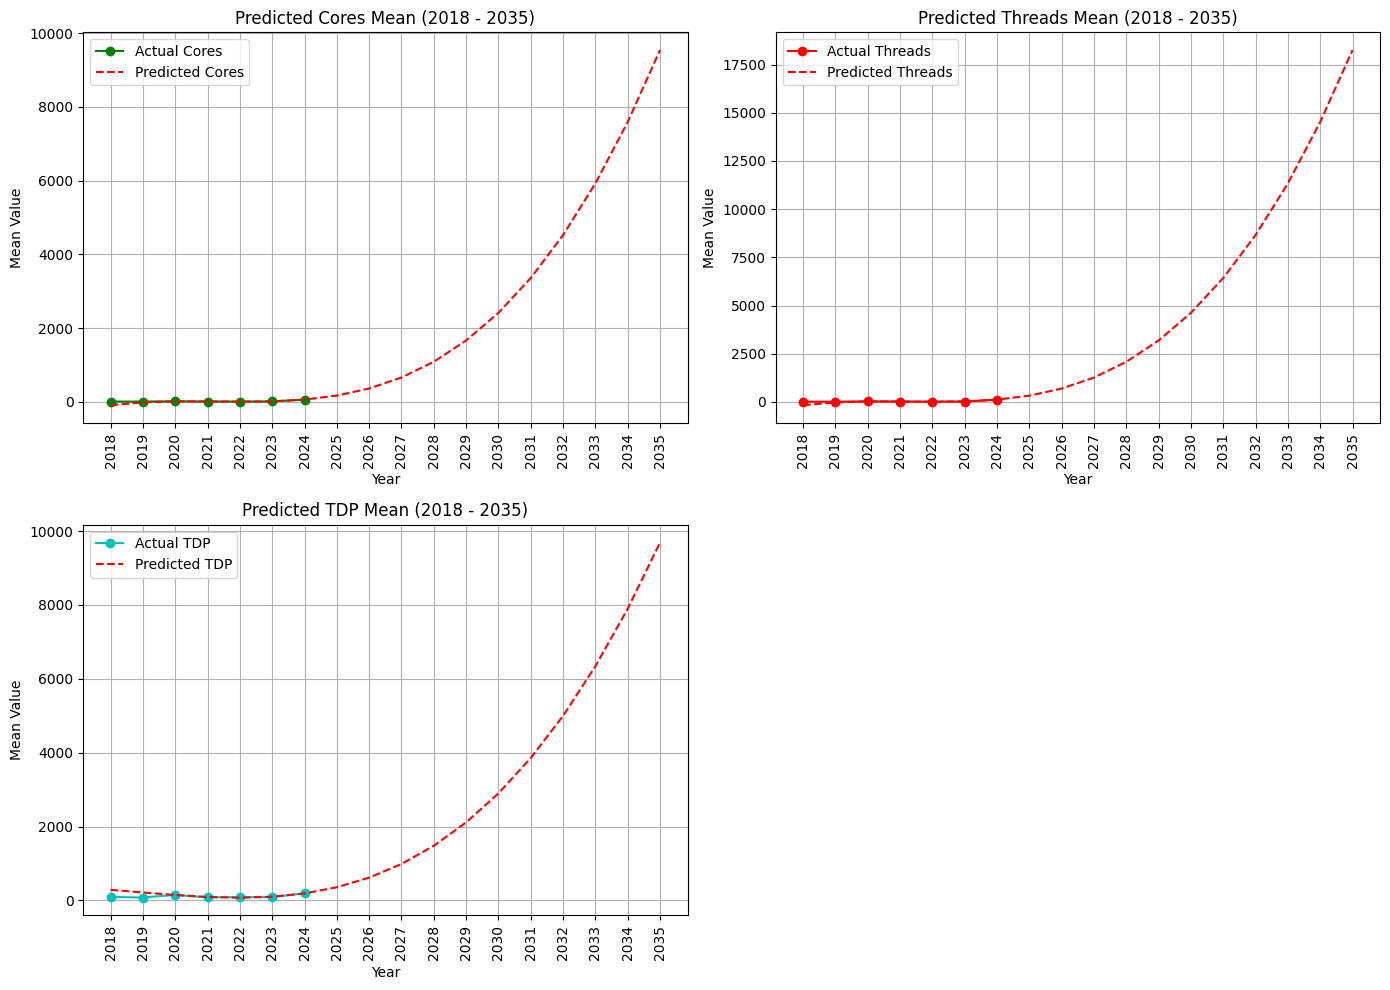

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score

def train_and_predict(X, y, degree=2):
    """Trains a polynomial regression model and makes predictions."""
    X_poly = PolynomialFeatures(degree=degree).fit_transform(X)
    model = LinearRegression().fit(X_poly, y)
    return model

def evaluate_model(model, X_poly, y):
    """Evaluates the model using cross-validation."""
    scores = cross_val_score(model, X_poly, y, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    print(f"RMSE: {rmse_scores.mean():.4f} (+/- {rmse_scores.std():.4f})")

# Prepare data for CPU
X = df_stats_cpu['Year'].values.reshape(-1, 1)

# Define target variables
y_base_clock = df_stats_cpu['Base_Clock_mean'].values  
y_cores = df_stats_cpu['Cores_mean'].values
y_threads = df_stats_cpu['Threads_mean'].values
y_tdp = df_stats_cpu['TDP_mean'].values  

years_to_predict = np.arange(2018, 2036).reshape(-1, 1)

# Train and predict for each feature
models = {}
predictions = {}
y_values = {
    'base_clock': y_base_clock,
    'cores': y_cores,
    'threads': y_threads,
    'tdp': y_tdp,
}

for feature, y in y_values.items():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = train_and_predict(X_train, y_train, degree=3)  
    X_future = PolynomialFeatures(degree=3).fit_transform(years_to_predict)
    prediction = model.predict(X_future)

    models[feature] = model
    predictions[feature] = prediction

    # Evaluation
    X_train_poly = PolynomialFeatures(degree=3).fit_transform(X_train)
    print(f"Evaluation for {feature}:")
    evaluate_model(model, X_train_poly, y_train)

plt.figure(figsize=(14, 10))

plot_data = {
    # 'base_clock': {'title': 'Predicted Base Clock Mean (2018 - 2035)', 'label_actual': 'Actual Base Clock', 'label_predicted': 'Predicted Base Clock', 'color': 'bo-'},
    'cores': {'title': 'Predicted Cores Mean (2018 - 2035)', 'label_actual': 'Actual Cores', 'label_predicted': 'Predicted Cores', 'color': 'go-'},
    'threads': {'title': 'Predicted Threads Mean (2018 - 2035)', 'label_actual': 'Actual Threads', 'label_predicted': 'Predicted Threads', 'color': 'ro-'},
    'tdp': {'title': 'Predicted TDP Mean (2018 - 2035)', 'label_actual': 'Actual TDP', 'label_predicted': 'Predicted TDP', 'color': 'co-'},
}

for i, (feature, data) in enumerate(plot_data.items(), 1):
    plt.subplot(2, 2, i)
    plt.plot(df_stats_cpu['Year'], y_values[feature], data['color'], label=data['label_actual'])
    plt.plot(years_to_predict, predictions[feature], 'r--', label=data['label_predicted'])
    plt.title(data['title'])
    plt.xlabel('Year')
    plt.ylabel('Mean Value')
    plt.legend()
    plt.xticks(range(2018, 2036), rotation=90)
    plt.grid(True)

plt.tight_layout()
plt.show()


# GPU

GPU STATS

In [128]:
print(gpu_df.columns)

Index(['ID', 'manufacturer', 'productName', 'releaseYear', 'memSize',
       'memBusWidth', 'gpuClock', 'memClock', 'unifiedShader', 'tmu', 'rop',
       'igp', 'bus', 'memType', 'gpuChip'],
      dtype='object')


In [129]:
years = gpu_df['releaseYear'].unique()
years

array([2025, 2024, 2023, 2022, 2021, 2020, 2019, 2018])

In [130]:
gpu_query = "SELECT memSize, gpuClock, unifiedShader, tmu, rop, memBusWidth, releaseYear FROM gpu;"
df_gpu = pd.read_sql(gpu_query, db)
print(f"Size of the original DataFrame: {df_gpu.shape}")

Size of the original DataFrame: (597, 7)


C:\Users\glori\AppData\Local\Temp\ipykernel_17636\4083632005.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_gpu = pd.read_sql(gpu_query, db)


In [131]:
df_gpu.columns

Index(['memSize', 'gpuClock', 'unifiedShader', 'tmu', 'rop', 'memBusWidth',
       'releaseYear'],
      dtype='object')

In [132]:
# Create separate DataFrames for each year
df_dict_gpu = {}

for year in years:
    # filter the data for each year
    df_year_gpu = df_gpu[df_gpu['releaseYear'] == year]

    # Clean the data
    df_year_gpu_clean = df_year_gpu[(['memSize'] != 0) & (df_year_gpu['gpuClock'] != 0) & (df_year_gpu['unifiedShader'] != 0) & (df_year_gpu['tmu'] != 0) & (df_year_gpu['rop'] !=0) & (df_year_gpu['memBusWidth'] !=0)] 

    df_dict_gpu[year] = df_year_gpu_clean

    print(f"Size of the DataFrame for {year}: {df_dict_gpu[year].shape}")

Size of the DataFrame for 2025: (6, 7)
Size of the DataFrame for 2024: (21, 7)
Size of the DataFrame for 2023: (100, 7)
Size of the DataFrame for 2022: (98, 7)
Size of the DataFrame for 2021: (88, 7)
Size of the DataFrame for 2020: (86, 7)
Size of the DataFrame for 2019: (105, 7)
Size of the DataFrame for 2018: (93, 7)


In [133]:
df_year_gpu_clean.head()

,memSize,gpuClock,unifiedShader,tmu,rop,memBusWidth,releaseYear
504,32,930,3584,224,96,,2018
505,32,1200,3584,224,64,,2018
506,32,1200,3584,224,64,,2018
507,32,852,3584,224,64,,2018
508,16,1138,3584,224,64,,2018


In [134]:
import pandas as pd

# Prepare an empty dictionary to store the statistics for each year
years = sorted(df_dict_gpu.keys())

# Prepare a dictionary to store statistics for each year
stats_dict_gpu = {
    'Year': [],
    'memSize_mean': [], 'memSize_median': [], 'memSize_mode': [], 'memSize_range': [], 'memSize_std': [],
    'gpuClock_mean': [], 'gpuClock_median': [], 'gpuClock_mode': [], 'gpuClock_range': [], 'gpuClock_std': [],
    'unifiedShader_mean': [], 'unifiedShader_median': [], 'unifiedShader_mode': [], 'unifiedShader_range': [], 'unifiedShader_std': [],
    'tmu_mean': [], 'tmu_median': [], 'tmu_mode': [], 'tmu_range': [], 'tmu_std': [],
    'rop_mean': [], 'rop_median': [], 'rop_mode': [], 'rop_range': [], 'rop_std': [],
    'memBusWidth_mean': [], 'memBusWidth_median': [], 'memBusWidth_mode': [], 'memBusWidth_range': [], 'memBusWidth_std': []
}

# Function to clean and convert columns to numeric
def clean_numeric_column(df, column):
    """Extracts numeric values from a column and converts them to float."""
    df[column] = df[column].astype(str).str.extract(r'(\d+)')[0] 
    return pd.to_numeric(df[column], errors='coerce')  

# Loop through each year in the dictionary and collect statistics
for year in years:
    df_year_gpu_clean = df_dict_gpu[year].copy() 
    year = int(year) 
    
    # Append the year to the stats dictionary
    stats_dict_gpu['Year'].append(year)
    
    # Process each specification column
    for spec in ['memSize', 'gpuClock', 'unifiedShader', 'tmu', 'rop', 'memBusWidth']:
        df_year_gpu_clean[spec] = clean_numeric_column(df_year_gpu_clean, spec)

        stats_dict_gpu[f'{spec}_mean'].append(df_year_gpu_clean[spec].mean(skipna=True))
        stats_dict_gpu[f'{spec}_median'].append(df_year_gpu_clean[spec].median(skipna=True))

        mode_value = df_year_gpu_clean[spec].mode()
        stats_dict_gpu[f'{spec}_mode'].append(mode_value.iloc[0] if not mode_value.empty else None)

        if df_year_gpu_clean[spec].dropna().empty:
            stats_dict_gpu[f'{spec}_range'].append(None)
        else:
            stats_dict_gpu[f'{spec}_range'].append(df_year_gpu_clean[spec].max() - df_year_gpu_clean[spec].min())

        stats_dict_gpu[f'{spec}_std'].append(df_year_gpu_clean[spec].std(skipna=True))

# Convert the stats dictionary to a DataFrame
df_stats_gpu = pd.DataFrame(stats_dict_gpu)

def print_table(stat_name):
    print(f"\n{stat_name} Stats:")
    print(f"Year\tMean\t\tMedian\t\tMode\t\tRange\t\tStd Dev")
    for index, row in df_stats_gpu.iterrows():
        print(f"{int(row['Year'])}\t"
              f"{row[f'{stat_name}_mean']:.4g}\t\t"  
              f"{row[f'{stat_name}_median']:.4g}\t\t"
              f"{row[f'{stat_name}_mode']:.4g}\t\t"
              f"{row[f'{stat_name}_range']:.4g}\t\t"
              f"{row[f'{stat_name}_std']:.4g}")
        
for spec in ['memSize', 'gpuClock', 'unifiedShader', 'tmu', 'rop', 'memBusWidth']:
    print_table(spec)



memSize Stats:
Year	Mean		Median		Mode		Range		Std Dev
2018	11.1		7		4		46		11.12
2019	7.432		6		4		30		7.268
2020	12.43		8		8		78		14.69
2021	16.27		9		8		126		22.64
2022	13.68		8		4		78		14.52
2023	28.69		12		8		188		36.49
2024	31.37		12		16		284		65.74
2025	13.33		10		8		20		7.866

gpuClock Stats:
Year	Mean		Median		Mode		Range		Std Dev
2018	661.9		675		300		1407		355.7
2019	702.8		650		450		1420		308.5
2020	893		775		574		2081		513
2021	801.4		724		275		1855		413.8
2022	1129		1088		1000		2090		546.9
2023	1133		1200		400		2060		533.6
2024	1212		1095		1000		2030		579.2
2025	1513		1610		900		1335		544.3

unifiedShader Stats:
Year	Mean		Median		Mode		Range		Std Dev
2018	1653		1664		384		3544		1230
2019	1076		512		400		3536		1077
2020	1476		1792		1792		3792		1190
2021	1367		512		512		3792		1176
2022	7415		5888		4096		1.434e+04		3744
2023	7446		5120		4096		1.536e+04		4240
2024	8677		6656		4608		1.587e+04		5491
2025	5675		4864		4608		3584		1522

tmu Stats:
Year	Mean		Median		Mode		Range	

c:\Users\glori\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\glori\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\glori\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\glori\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


GPU PREDICTION AND VISUALIZATION

Evaluation for mem_size:
RMSE: 9.8902 (+/- 8.7615)
Evaluation for gpu_clock:
RMSE: 140.2666 (+/- 24.9814)
Evaluation for unified_shader:
RMSE: 3865.8269 (+/- 1474.3852)
Evaluation for tmu:
RMSE: 107.4473 (+/- 38.4447)
Evaluation for rop:
RMSE: 25.3867 (+/- 14.4804)
Evaluation for mem_bus_width:
RMSE: 322.7486 (+/- 296.9189)


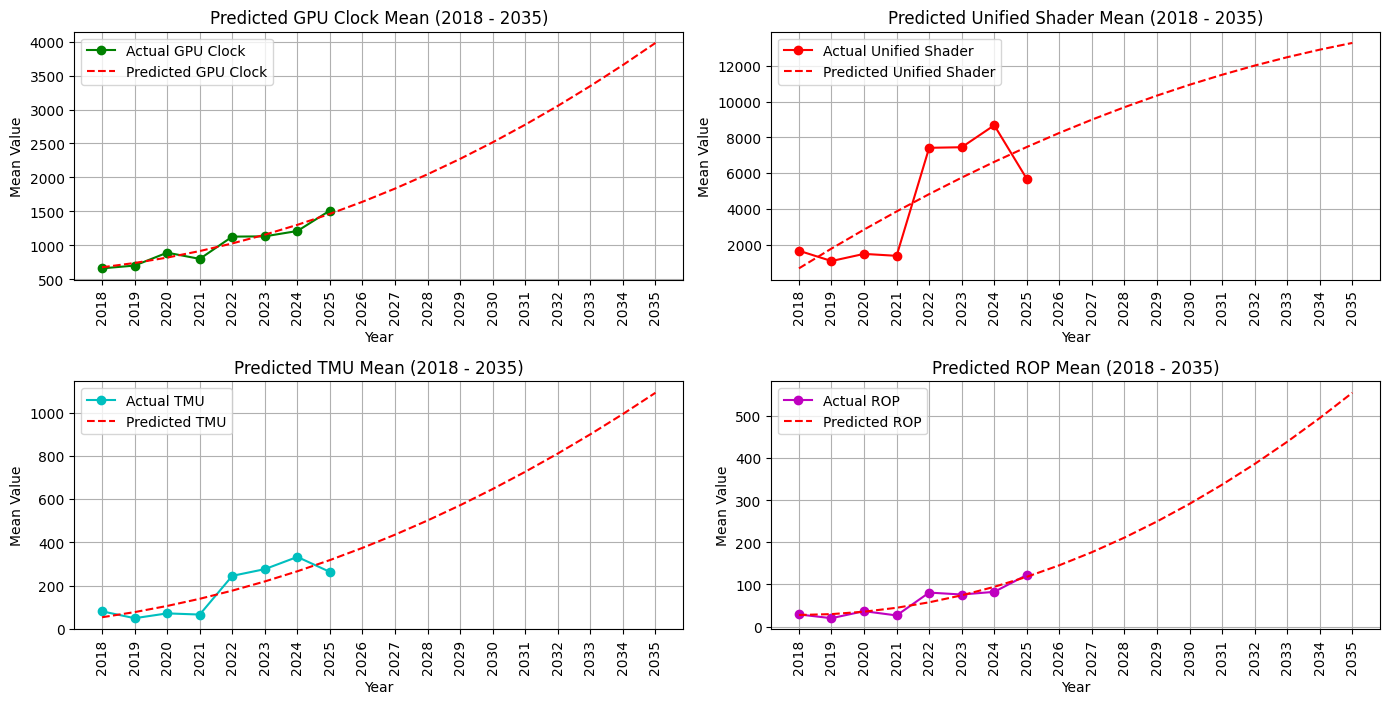

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

def train_and_predict(X, y, degree=2):
    """Trains a polynomial regression model and makes predictions."""
    X_poly = PolynomialFeatures(degree=degree).fit_transform(X)
    model = LinearRegression().fit(X_poly, y)
    return model

def evaluate_model(model, X_poly, y):
    """Evaluates the model using cross-validation."""
    scores = cross_val_score(model, X_poly, y, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    print(f"RMSE: {rmse_scores.mean():.4f} (+/- {rmse_scores.std():.4f})")


X = df_stats_gpu['Year'].values.reshape(-1, 1)
y_mem_size = df_stats_gpu['memSize_mean']
y_gpu_clock = df_stats_gpu['gpuClock_mean']
y_unified_shader = df_stats_gpu['unifiedShader_mean']
y_tmu = df_stats_gpu['tmu_mean']
y_rop = df_stats_gpu['rop_mean']
y_mem_bus_width = df_stats_gpu['memBusWidth_mean'].fillna(df_stats_gpu['memBusWidth_mean'].mean())

years_to_predict = np.arange(2018, 2036).reshape(-1, 1)

# Train and predict for each feature
models = {}
predictions = {}
y_values = {
    'mem_size': y_mem_size,
    'gpu_clock': y_gpu_clock,
    'unified_shader': y_unified_shader,
    'tmu': y_tmu,
    'rop': y_rop,
    'mem_bus_width': y_mem_bus_width,
}

for feature, y in y_values.items():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = train_and_predict(X_train, y_train, degree=2)  
    X_future = PolynomialFeatures(degree=2).fit_transform(years_to_predict)
    prediction = model.predict(X_future)

    models[feature] = model
    predictions[feature] = prediction

    # Evaluation
    X_train_poly = PolynomialFeatures(degree=2).fit_transform(X_train)
    print(f"Evaluation for {feature}:")
    evaluate_model(model, X_train_poly, y_train)

plt.figure(figsize=(14, 10))

plot_data = {
    # 'mem_size': {'title': 'Predicted Memory Size Mean (2018 - 2035)', 'label_actual': 'Actual Memory Size', 'label_predicted': 'Predicted Memory Size', 'color': 'bo-'},
    'gpu_clock': {'title': 'Predicted GPU Clock Mean (2018 - 2035)', 'label_actual': 'Actual GPU Clock', 'label_predicted': 'Predicted GPU Clock', 'color': 'go-'},
    'unified_shader': {'title': 'Predicted Unified Shader Mean (2018 - 2035)', 'label_actual': 'Actual Unified Shader', 'label_predicted': 'Predicted Unified Shader', 'color': 'ro-'},
    'tmu': {'title': 'Predicted TMU Mean (2018 - 2035)', 'label_actual': 'Actual TMU', 'label_predicted': 'Predicted TMU', 'color': 'co-'},
    'rop': {'title': 'Predicted ROP Mean (2018 - 2035)', 'label_actual': 'Actual ROP', 'label_predicted': 'Predicted ROP', 'color': 'mo-'},
    # 'mem_bus_width': {'title': 'Predicted Memory Bus Width Mean (2018 - 2035)', 'label_actual': 'Actual Memory Bus Width', 'label_predicted': 'Predicted Memory Bus Width', 'color': 'yo-'},
}

for i, (feature, data) in enumerate(plot_data.items(), 1):
    plt.subplot(3, 2, i)
    plt.plot(df_stats_gpu['Year'], y_values[feature], data['color'], label=data['label_actual'])
    plt.plot(years_to_predict, predictions[feature], 'r--', label=data['label_predicted'])
    plt.title(data['title'])
    plt.xlabel('Year')
    plt.ylabel('Mean Value')
    plt.legend()
    plt.xticks(range(2018, 2036), rotation=90)
    plt.grid(True)

plt.tight_layout()
plt.show()

# OPERATING SYSTEMS

STATISTICS

In [136]:
print(os_df.columns)

Index(['ID', 'Name', 'Price', 'Model', 'MAX_MEMORY', 'Year_of_Manufacture'], dtype='object')


In [137]:
years = os_df['Year_of_Manufacture'].unique()
years

array([2021, 2018, 2019, 2020, 2022, 2023, 2024])

In [138]:
os_query = "SELECT MAX_MEMORY, Year_of_Manufacture FROM os;"
df_os = pd.read_sql(os_query, db)
print(f"Size of the original DataFrame: {df_os.shape}")

Size of the original DataFrame: (117, 2)


C:\Users\glori\AppData\Local\Temp\ipykernel_17636\2546450561.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_os = pd.read_sql(os_query, db)


In [139]:
df_os.head()

,MAX_MEMORY,Year_of_Manufacture
0,128,2021
1,2048,2021
2,128,2021
3,2048,2021
4,128,2021


In [140]:
print(df_os.columns)

Index(['MAX_MEMORY', 'Year_of_Manufacture'], dtype='object')


In [141]:
# Create separate DataFrames for each year
df_dict_os = {}

for year in years:
    
    df_year_os = df_os[df_os['Year_of_Manufacture'] == year]
    df_dict_os[year] = df_year_os

    print(f"Size of the DataFrame for {year}: {df_dict_os[year].shape}")

Size of the DataFrame for 2021: (26, 2)
Size of the DataFrame for 2018: (21, 2)
Size of the DataFrame for 2019: (19, 2)
Size of the DataFrame for 2020: (18, 2)
Size of the DataFrame for 2022: (14, 2)
Size of the DataFrame for 2023: (13, 2)
Size of the DataFrame for 2024: (6, 2)


In [142]:
import pandas as pd

# Prepare an empty dictionary to store the statistics for each year
years = sorted(df_dict_os.keys()) 

# Prepare a dictionary to store statistics for each year
stats_dict_os = {
    'Year': [],
    'Max_Memory_mean': [], 'Max_Memory_median': [], 'Max_Memory_mode': [], 'Max_Memory_range': [], 'Max_Memory_std': []
}

# Loop through each year in the dictionary and collect statistics
for year in years:
    df_year_os_clean = df_dict_os[year]
    year = int(year)
    
    # Calculate stats for each category and append to the dictionary
    stats_dict_os['Year'].append(year)
    
    stats_dict_os['Max_Memory_mean'].append(df_year_os_clean['MAX_MEMORY'].mean())
    stats_dict_os['Max_Memory_median'].append(df_year_os_clean['MAX_MEMORY'].median())
    stats_dict_os['Max_Memory_mode'].append(df_year_os_clean['MAX_MEMORY'].mode()[0])
    stats_dict_os['Max_Memory_range'].append(df_year_os_clean['MAX_MEMORY'].max() - df_year_os_clean['MAX_MEMORY'].min())
    stats_dict_os['Max_Memory_std'].append(df_year_os_clean['MAX_MEMORY'].std())

# Convert the stats dictionary to a DataFrame
df_stats_os = pd.DataFrame(stats_dict_os)

# Print the statistics for each year
print("OS STATS")
def print_table_os():
    print("\nMax_Memory Stats:")
    print(f"Year\tMean\t\tMedian\t\tMode\t\tRange\t\tStd Dev")
    for index, row in df_stats_os.iterrows():
        print(f"{int(row['Year'])}\t"
              f"{row['Max_Memory_mean']:.4g}\t\t"
              f"{row['Max_Memory_median']:.4g}\t\t"
              f"{row['Max_Memory_mode']:.4g}\t\t"
              f"{row['Max_Memory_range']:.4g}\t\t"
              f"{row['Max_Memory_std']:.4g}")

print_table_os()


OS STATS

Max_Memory Stats:
Year	Mean		Median		Mode		Range		Std Dev
2018	391.6		128		128		2032		693.7
2019	116.2		128		128		112		35.31
2020	115.6		128		128		112		36.22
2021	340.9		128		128		2032		629.5
2022	112		128		128		112		40.67
2023	128		128		128		0		0
2024	128		128		128		0		0


OS PREDICTION AND VISUALIZATION

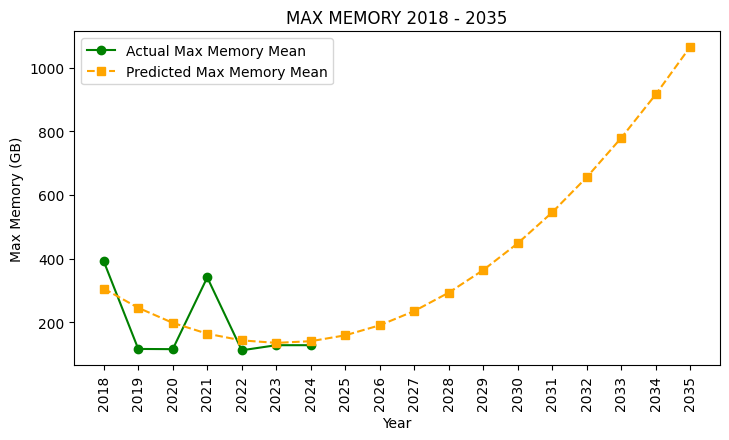

In [143]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Prepare data for polynomial regression
X_os = df_stats_os['Year'].values.reshape(-1, 1)
y_max_memory = df_stats_os['Max_Memory_mean'].values

degree = 2
poly = PolynomialFeatures(degree=degree)
X_os_poly = poly.fit_transform(X_os)

# Fit polynomial regression model for Max Memory Mean
model_max_memory = LinearRegression().fit(X_os_poly, y_max_memory)

# Predictions
years_to_predict_os = np.arange(2018, 2036).reshape(-1, 1)
years_to_predict_os_poly = poly.transform(years_to_predict_os)

predicted_max_memory = model_max_memory.predict(years_to_predict_os_poly)

# Plotting the statistics for MAX_MEMORY and predictions
plt.figure(figsize=(14, 8))

# Plotting Mean values and predictions
plt.subplot(2, 2, 1)
plt.plot(df_stats_os['Year'], df_stats_os['Max_Memory_mean'], label="Actual Max Memory Mean", color='green', marker='o')
plt.plot(years_to_predict_os, predicted_max_memory, label="Predicted Max Memory Mean", color='orange', linestyle='--', marker='s')
plt.title('MAX MEMORY 2018 - 2035')
plt.xlabel('Year')
plt.ylabel('Max Memory (GB)')
plt.legend()
plt.xticks(range(2018, 2036), rotation=90)

plt.tight_layout()
plt.show()


# HARD DISK DRIVES

STATISTICS CALCULATIONS

In [144]:
hdd_df.columns

Index(['ID', 'Manufacturer', 'Product_Name', 'Release_Year', 'Price',
       'Model_Number', 'Form_Factor', 'Capacity', 'RPM', 'Cache'],
      dtype='object')

In [145]:
hdd_df.head()

,ID,Manufacturer,Product_Name,Release_Year,Price,Model_Number,Form_Factor,Capacity,RPM,Cache
0,2,Seagate,Enterprise Hard Drive,2018,0.00,ST6000NM0024,"3.5""",6,7200,128
1,3,Seagate,Enterprise Hard Drive,2018,0.00,ST3000NM0033,"3.5""",3,7200,128
2,4,Seagate,Enterprise Hard Drive v5,2018,0.00,ST6000NM0115,"3.5""",6,7200,128
3,5,Seagate,Enterprise NAS Hard Drive,2018,0.00,ST2000VN0001,"3.5""",2,7200,128
4,6,Seagate,Enterprise NAS Hard Drive,2018,0.00,ST4000VN0001,"3.5""",4,7200,128


In [146]:
years = hdd_df['Release_Year'].unique()
years

array([2018, 2019, 2020, 2021, 2022, 2023, 2024])

In [147]:
hdd_query = "SELECT Form_Factor, Capacity, RPM, Cache, Release_Year FROM hdd;"
df_hdd = pd.read_sql(hdd_query, db)
print(f"Size of the original DataFrame: {df_hdd.shape}")

Size of the original DataFrame: (160, 5)


C:\Users\glori\AppData\Local\Temp\ipykernel_17636\2944167775.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_hdd = pd.read_sql(hdd_query, db)


In [148]:
df_hdd.head()

,Form_Factor,Capacity,RPM,Cache,Release_Year
0,"3.5""",6,7200,128,2018
1,"3.5""",3,7200,128,2018
2,"3.5""",6,7200,128,2018
3,"3.5""",2,7200,128,2018
4,"3.5""",4,7200,128,2018


In [149]:
# Create separate DataFrames for each year
df_dict_hdd = {}

for year in years:
    # filter the data for the specific year
    df_year_hdd = df_hdd[df_hdd['Release_Year'] == year]

    # clean the data
    df_year_hdd.loc[:, 'Form_Factor'] = df_year_hdd['Form_Factor'].str.replace('"', '', regex=False).astype(float)
    df_year_hdd_clean = df_year_hdd[(['Capacity'] != 0) & (df_year_hdd['RPM'] != 0) & (df_year_hdd['Cache'] != 0)] 

    
    df_dict_hdd[year] = df_year_hdd_clean

    print(f"Size of the DataFrame for {year}: {df_dict_hdd[year].shape}")

Size of the DataFrame for 2018: (28, 5)
Size of the DataFrame for 2019: (55, 5)
Size of the DataFrame for 2020: (19, 5)
Size of the DataFrame for 2021: (7, 5)
Size of the DataFrame for 2022: (7, 5)
Size of the DataFrame for 2023: (9, 5)
Size of the DataFrame for 2024: (1, 5)


In [150]:
import pandas as pd

# Prepare an empty dictionary to store the statistics for each year
years = sorted(df_dict_hdd.keys())  

# Prepare a dictionary to store statistics for each year
stats_dict_hdd = {
    'Year': [], 
    'Form_Factor_mean': [], 'Form_Factor_median': [], 'Form_Factor_mode': [], 'Form_Factor_range': [], 'Form_Factor_std': [],
    'Capacity_mean': [], 'Capacity_median': [], 'Capacity_mode': [], 'Capacity_range': [], 'Capacity_std': [],
    'RPM_mean': [], 'RPM_median': [], 'RPM_mode': [], 'RPM_range': [], 'RPM_std': [],
    'Cache_mean': [], 'Cache_median': [], 'Cache_mode': [], 'Cache_range': [], 'Cache_std': []
}

# Specifications to calculate statistics for
specifications = ['Form_Factor', 'Capacity', 'RPM', 'Cache']

# Loop through each year in the dictionary and collect statistics
for year in years:
    df_year_hdd_clean = df_dict_hdd[year]
    year = int(year)
    
    stats_dict_hdd['Year'].append(year)

    # For each specification, calculate the desired statistics
    for spec in specifications:
        stats_dict_hdd[f'{spec}_mean'].append(df_year_hdd_clean[spec].mean())
        stats_dict_hdd[f'{spec}_median'].append(df_year_hdd_clean[spec].median())
        stats_dict_hdd[f'{spec}_mode'].append(df_year_hdd_clean[spec].mode().iloc[0]) 
        stats_dict_hdd[f'{spec}_range'].append(df_year_hdd_clean[spec].max() - df_year_hdd_clean[spec].min())
        stats_dict_hdd[f'{spec}_std'].append(df_year_hdd_clean[spec].std())


# Convert the stats dictionary to a DataFrame
df_stats_hdd = pd.DataFrame(stats_dict_hdd)

# Print the statistics for each year in table format
print("HDD Stats")
def print_table(stat_name):
    print(f"\n{stat_name} Stats:")
    print(f"Year\tMean\t\tMedian\t\tMode\t\tRange\t\tStd Dev")
    for index, row in df_stats_hdd.iterrows():
        print(f"{int(row['Year'])}\t"
              f"{row[f'{stat_name}_mean']:.4g}\t\t"
              f"{row[f'{stat_name}_median']:.4g}\t\t"
              f"{row[f'{stat_name}_mode']:.4g}\t\t"
              f"{row[f'{stat_name}_range']:.4g}\t\t"
              f"{row[f'{stat_name}_std']:.4g}")


print_table('Form_Factor')
print_table('Capacity')
print_table('RPM')
print_table('Cache')


HDD Stats

Form_Factor Stats:
Year	Mean		Median		Mode		Range		Std Dev
2018	3.464		3.5		3.5		1		0.189
2019	3.391		3.5		3.5		1		0.3146
2020	3.5		3.5		3.5		0		0
2021	3.5		3.5		3.5		0		0
2022	3.5		3.5		3.5		0		0
2023	3.5		3.5		3.5		0		0
2024	3.5		3.5		3.5		0		nan

Capacity Stats:
Year	Mean		Median		Mode		Range		Std Dev
2018	8.143		8		6		14		4.08
2019	5.273		4		1		15		3.592
2020	6.684		6		2		12		4.204
2021	11.43		12		2		16		5.381
2022	12.29		8		6		18		7.952
2023	20		20		20		16		4.796
2024	16		16		16		0		nan

RPM Stats:
Year	Mean		Median		Mode		Range		Std Dev
2018	7025		7200		7200		1800		520.4
2019	6564		7200		7200		1800		854.5
2020	5709		5400		5400		1800		667.3
2021	7200		7200		7200		0		0
2022	6943		7200		7200		1800		680.3
2023	7000		7200		7200		1800		600
2024	7200		7200		7200		0		nan

Cache Stats:
Year	Mean		Median		Mode		Range		Std Dev
2018	205.7		256		256		128		63.66
2019	167.4		128		128		504		105.6
2020	218.9		256		256		448		128.6
2021	338.3		256		256		448		176.1
2022	265.1		256		256		4

PREDICTION AND VISUALIZATION

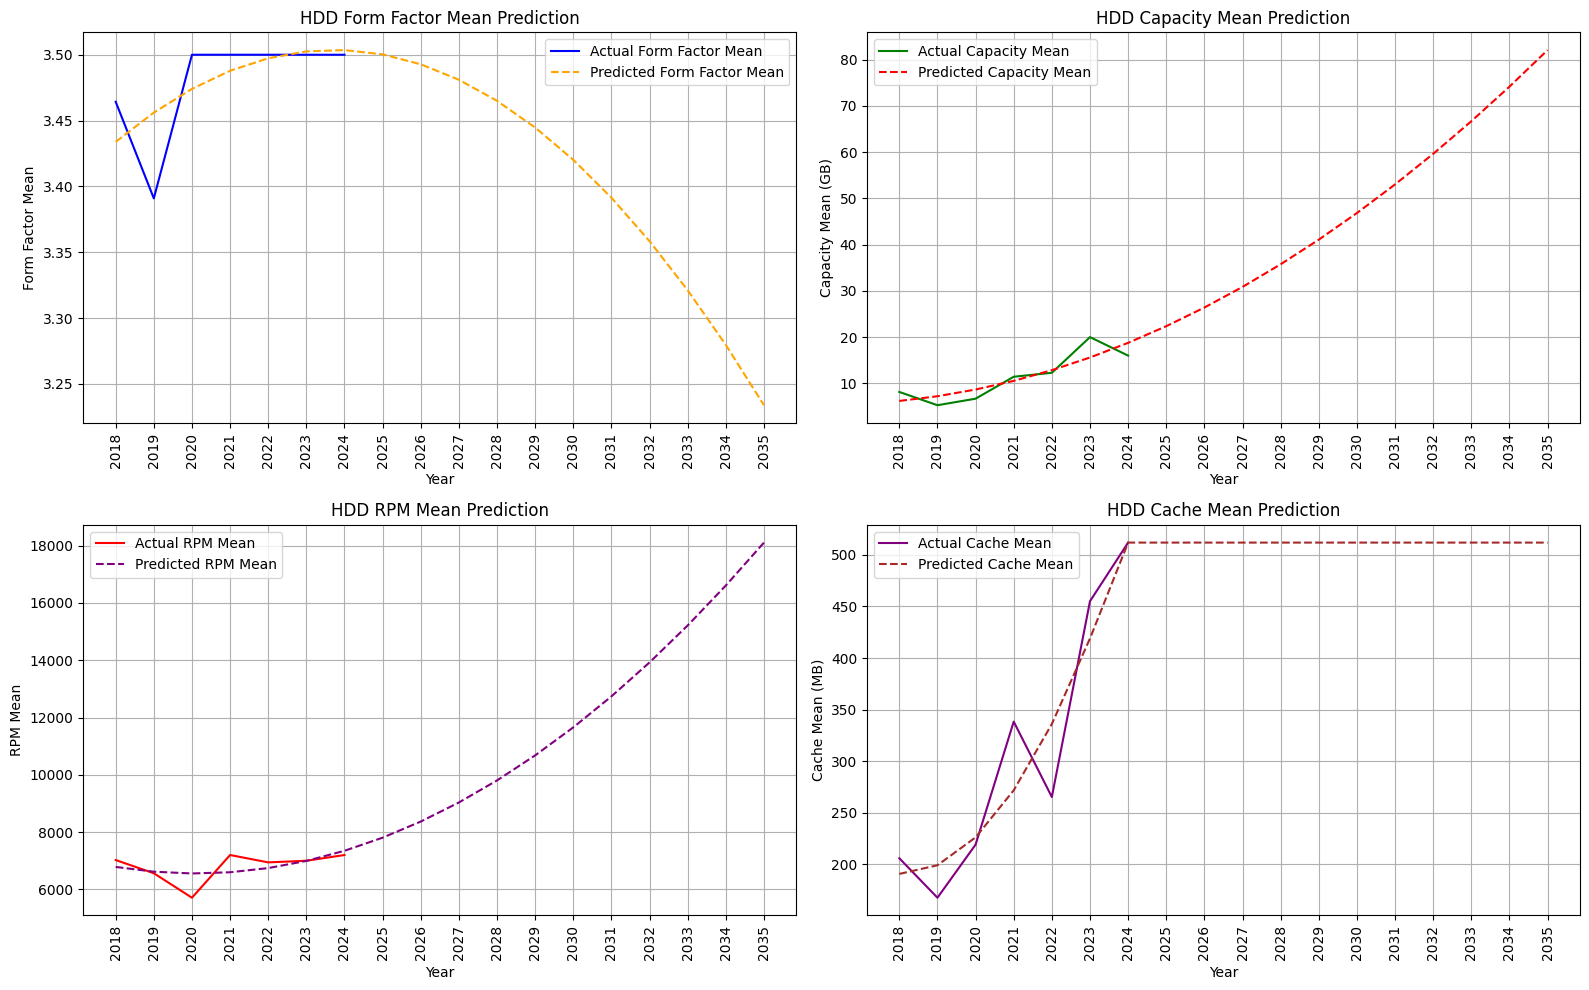

In [151]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Prepare data for polynomial regression
X = df_stats_hdd['Year'].values.reshape(-1, 1)  
y_form_factor = df_stats_hdd['Form_Factor_mean'].values  
y_capacity = df_stats_hdd['Capacity_mean'].values  
y_rpm = df_stats_hdd['RPM_mean'].values  
y_cache = df_stats_hdd['Cache_mean'].values  

degree = 2  
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

# Fit polynomial regression models for each feature
model_form_factor = LinearRegression().fit(X_poly, y_form_factor)
model_capacity = LinearRegression().fit(X_poly, y_capacity)
model_rpm = LinearRegression().fit(X_poly, y_rpm)
model_cache = LinearRegression().fit(X_poly, y_cache)

# Predict values for future years (2018-2035)
years_to_predict = np.arange(2018, 2036).reshape(-1, 1)
years_to_predict_poly = poly.transform(years_to_predict)

predicted_form_factor = model_form_factor.predict(years_to_predict_poly)
predicted_capacity = model_capacity.predict(years_to_predict_poly)
predicted_rpm = model_rpm.predict(years_to_predict_poly)
predicted_cache = model_cache.predict(years_to_predict_poly)

predicted_capacity = np.clip(predicted_capacity, 0, 10000)  
predicted_rpm = np.clip(predicted_rpm, 1000, 20000) 
predicted_cache = np.clip(predicted_cache, 0, 512)  

plt.figure(figsize=(16, 10))

# Form Factor Prediction
plt.subplot(2, 2, 1)
plt.plot(df_stats_hdd['Year'], df_stats_hdd['Form_Factor_mean'], label="Actual Form Factor Mean", color='blue')
plt.plot(years_to_predict, predicted_form_factor, label="Predicted Form Factor Mean", color='orange', linestyle='--')
plt.title('HDD Form Factor Mean Prediction')
plt.xlabel('Year')
plt.ylabel('Form Factor Mean')
plt.legend()
plt.xticks(range(2018, 2036), rotation=90)
plt.grid(True)

# Capacity Prediction
plt.subplot(2, 2, 2)
plt.plot(df_stats_hdd['Year'], df_stats_hdd['Capacity_mean'], label="Actual Capacity Mean", color='green')
plt.plot(years_to_predict, predicted_capacity, label="Predicted Capacity Mean", color='red', linestyle='--')
plt.title('HDD Capacity Mean Prediction')
plt.xlabel('Year')
plt.ylabel('Capacity Mean (GB)')
plt.legend()
plt.xticks(range(2018, 2036), rotation=90)
plt.grid(True)

# RPM Prediction
plt.subplot(2, 2, 3)
plt.plot(df_stats_hdd['Year'], df_stats_hdd['RPM_mean'], label="Actual RPM Mean", color='red')
plt.plot(years_to_predict, predicted_rpm, label="Predicted RPM Mean", color='purple', linestyle='--')
plt.title('HDD RPM Mean Prediction')
plt.xlabel('Year')
plt.ylabel('RPM Mean')
plt.legend()
plt.xticks(range(2018, 2036), rotation=90)
plt.grid(True)

# Cache Prediction
plt.subplot(2, 2, 4)
plt.plot(df_stats_hdd['Year'], df_stats_hdd['Cache_mean'], label="Actual Cache Mean", color='purple')
plt.plot(years_to_predict, predicted_cache, label="Predicted Cache Mean", color='brown', linestyle='--')
plt.title('HDD Cache Mean Prediction')
plt.xlabel('Year')
plt.ylabel('Cache Mean (MB)')
plt.legend()
plt.xticks(range(2018, 2036), rotation=90)
plt.grid(True)

plt.tight_layout()
plt.show()


# SOLID STATE DRIVES 

STATISTICS CALCULATIONS

In [152]:
ssd_df.columns

Index(['ID', 'Manufacturer', 'Product_Name', 'Year', 'Price', 'Model_Number',
       'Form_Factor', 'Interface', 'Capacity', 'NAND_Type', 'Controller'],
      dtype='object')

In [153]:
ssd_df.head()

,ID,Manufacturer,Product_Name,Year,Price,Model_Number,Form_Factor,Interface,Capacity,NAND_Type,Controller
0,1,Crucial,P1 1000 GB,2018,0.00,CT1000P1SSD8,M.2,NVMe,1000,QLC,Silicon Motion SM2263EN
1,2,Gigabyte,UD PRO Series 512 GB,2018,0.00,GP-GSTFS30512GTTD,SATA,SATA,512,TLC,Unknown
2,3,Crucial,MX500 M.2 1000 GB,2018,0.00,CT1000MX500SSD4,M.2,SATA,1000,TLC,Silicon Motion SM2258
3,4,Intel,660P Series 1000 GB,2018,0.00,SSDPEKNW010T8X1,M.2,NVMe,1000,QLC,Silicon Motion SM2263EN
4,5,Intel,760p Series 512 GB,2018,0.00,SSDPEKKW512G8XT,M.2,NVMe,512,TLC,Silicon Motion SM2262


In [154]:
years = ssd_df['Year'].unique()
years

array([2018, 2019, 2020, 2021, 2022, 2023])

In [155]:
ssd_query = "SELECT Capacity, Year FROM ssd;"
df_ssd = pd.read_sql(ssd_query, db)
print(f"Size of the original DataFrame: {df_ssd.shape}")

Size of the original DataFrame: (147, 2)


C:\Users\glori\AppData\Local\Temp\ipykernel_17636\3456898298.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_ssd = pd.read_sql(ssd_query, db)


In [156]:
df_ssd.head()

,Capacity,Year
0,1000,2018
1,512,2018
2,1000,2018
3,1000,2018
4,512,2018


In [157]:
# Create separate DataFrames for each year
df_dict_ssd = {}

for year in years:
    # Filter the data for the specific year
    df_year_ssd = df_ssd[df_ssd['Year'] == year]

    # Store the cleaned DataFrame for the given year
    df_dict_ssd[year] = df_year_ssd

    # Print the size of the cleaned DataFrame for the current year
    print(f"Size of the DataFrame for {year}: {df_dict_ssd[year].shape}")


Size of the DataFrame for 2018: (60, 2)
Size of the DataFrame for 2019: (30, 2)
Size of the DataFrame for 2020: (28, 2)
Size of the DataFrame for 2021: (17, 2)
Size of the DataFrame for 2022: (10, 2)
Size of the DataFrame for 2023: (2, 2)


In [158]:
import pandas as pd

# Prepare an empty dictionary to store the statistics for each year
years = sorted(df_dict_ssd.keys()) 

# Prepare a dictionary to store statistics for each year
stats_dict_ssd = {
    'Year': [],
    'Capacity_mean': [], 'Capacity_median': [], 'Capacity_mode': [], 'Capacity_range': [], 'Capacity_std': []
}

def format_value(value):
    if pd.isna(value):  
        return "NaN"
    return f"{value:.4g}" 

# Loop through each year in the dictionary and collect statistics
for year in years:
    df_year_ssd_clean = df_dict_ssd[year]
    year = int(year)
    
    # Calculate stats for each category and append to the dictionary
    stats_dict_ssd['Year'].append(year)
    
    stats_dict_ssd['Capacity_mean'].append(df_year_ssd_clean['Capacity'].mean())
    stats_dict_ssd['Capacity_median'].append(df_year_ssd_clean['Capacity'].median())
    stats_dict_ssd['Capacity_mode'].append(df_year_ssd_clean['Capacity'].mode()[0])
    stats_dict_ssd['Capacity_range'].append(df_year_ssd_clean['Capacity'].max() - df_year_ssd_clean['Capacity'].min())
    stats_dict_ssd['Capacity_std'].append(df_year_ssd_clean['Capacity'].std())

# Convert the stats dictionary to a DataFrame
df_stats_ssd = pd.DataFrame(stats_dict_ssd)

# Print the statistics for each year with two-tab separation
print("SSD Stats")
print("\nCapacity Stats:")
print("Year\t\tMean\t\tMedian\t\tMode\t\tRange\t\tStd Dev")

for index, row in df_stats_ssd.iterrows():
    year = int(row['Year'])
    print(
        f"{year}\t\t"
        f"{format_value(row['Capacity_mean'])}\t\t"
        f"{format_value(row['Capacity_median'])}\t\t"
        f"{format_value(row['Capacity_mode'])}\t\t"
        f"{format_value(row['Capacity_range'])}\t\t"
        f"{format_value(row['Capacity_std'])}"
    )


SSD Stats

Capacity Stats:
Year		Mean		Median		Mode		Range		Std Dev
2018		618.6		500		1000		1942		515.3
2019		1035		1000		2000		1750		686.2
2020		1630		1000		2000		7760		1582
2021		1809		1000		1000		3750		1374
2022		1800		1500		1000		3500		1295
2023		2500		2500		1000		3000		2121


PREDICTION 2018-2035

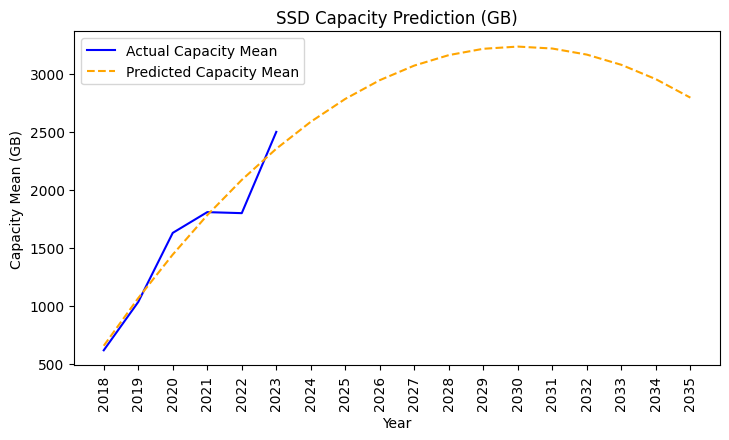

In [159]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Prepare data for polynomial regression
X = df_stats_ssd['Year'].values.reshape(-1, 1)  
y_capacity = df_stats_ssd['Capacity_mean'].values  

# Use a lower polynomial degree to avoid overfitting
degree = 2
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

# Fit polynomial regression model for SSD Capacity
model_capacity = LinearRegression().fit(X_poly, y_capacity)

# Predict values for future years (2018-2035)
years_to_predict = np.arange(2018, 2036).reshape(-1, 1)
years_to_predict_poly = poly.transform(years_to_predict)

predicted_capacity = model_capacity.predict(years_to_predict_poly)

# Clip
predicted_capacity = np.clip(predicted_capacity, 0, 10000)  # Limit for Capacity (GB)

# Plotting the results
plt.figure(figsize=(14, 8))

# Plotting SSD Capacity with prediction
plt.subplot(2, 2, 1)
plt.plot(df_stats_ssd['Year'], df_stats_ssd['Capacity_mean'], label="Actual Capacity Mean", color='b')
plt.plot(years_to_predict, predicted_capacity, label="Predicted Capacity Mean", color='orange', linestyle='--')
plt.title('SSD Capacity Prediction (GB)')
plt.xlabel('Year')
plt.ylabel('Capacity Mean (GB)')
plt.legend()
plt.xticks(range(2018, 2036), rotation=90)

plt.tight_layout()
plt.show()


# RANDOM ACCESS MEMORY

In [160]:
ram_df.columns

Index(['ID', 'Name', 'Price', 'Year', 'Manufacturer', 'MPN', 'RAM_Type',
       'Size', 'Clock', 'Sticks'],
      dtype='object')

In [161]:
ram_df.head()

,ID,Name,Price,Year,Manufacturer,MPN,RAM_Type,Size,Clock,Sticks
0,1,Kingston Fury Beast,0.00,2021,Kingston,KF548C38BBK2-32,DDR5-4800,32,4800,2
1,2,Corsair Vengeance RGB RT,0.00,2021,Corsair,CMN32GX4M2Z3600C18W,DDR4-3600,32,3600,2
2,3,Corsair Vengeance RGB RT,0.00,2021,Corsair,CMN32GX4M2Z3600C16,DDR4-3600,32,3600,2
3,4,Corsair Vengeance RGB RT,0.00,2021,Corsair,CMN32GX4M2Z3200C16,DDR4-3200,32,3200,2
4,5,G.Skill Trident Z DDR4-3200 16GB,0.00,2019,G.Skill,F4-3200C16D-16GTZSW,DDR4-3200,16,3200,2


In [162]:
ram_query = "SELECT RAM_Type, Size, Clock, Sticks, Year FROM ram;"
df_ram = pd.read_sql(ram_query, db)
print(f"Size of the original DataFrame: {df_ram.shape}")

Size of the original DataFrame: (282, 5)


C:\Users\glori\AppData\Local\Temp\ipykernel_17636\3687900115.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_ram = pd.read_sql(ram_query, db)


In [163]:
df_ram.head()

,RAM_Type,Size,Clock,Sticks,Year
0,DDR5-4800,32,4800,2,2021
1,DDR4-3600,32,3600,2,2021
2,DDR4-3600,32,3600,2,2021
3,DDR4-3200,32,3200,2,2021
4,DDR4-3200,16,3200,2,2019


In [164]:
years = df_ram['Year'].unique()
years

array([2021, 2019, 2020, 2018, 2022, 2023])

In [165]:
# Create separate DataFrames for each year
df_dict_ram = {}

for year in years:
    # Filter the data for the specific year
    df_year_ram = df_ram[df_ram['Year'] == year]

    # Ensure 'RAM_Type' is of type string using .loc
    df_year_ram.loc[:, 'RAM_Type'] = df_year_ram['RAM_Type'].astype(str)

    # Clean the data: Extract the numeric RAM 
    df_year_ram.loc[:, 'RAM_Type'] = df_year_ram['RAM_Type'].str.extract(r'-(\d+)', expand=False).astype(float)

    # Clean the DataFrame to remove rows where RAM_Type, Size, or Sticks are 0 or NaN
    df_year_ram_clean = df_year_ram[(df_year_ram['RAM_Type'] != 0) & 
                                     (df_year_ram['Size'] != 0) & 
                                     (df_year_ram['Sticks'] != 0)] 

    # Store the cleaned DataFrame for the given year
    df_dict_ram[year] = df_year_ram_clean

    print(f"Size of the DataFrame for {year}: {df_dict_ram[year].shape}")


Size of the DataFrame for 2021: (76, 5)
Size of the DataFrame for 2019: (70, 5)
Size of the DataFrame for 2020: (30, 5)
Size of the DataFrame for 2018: (16, 5)
Size of the DataFrame for 2022: (64, 5)
Size of the DataFrame for 2023: (26, 5)


In [166]:
df_year_ram_clean.head()

,RAM_Type,Size,Clock,Sticks,Year
85,5600.0,48,5600,2,2023
97,7200.0,32,7200,2,2023
98,7000.0,32,7000,2,2023
107,7200.0,32,7200,2,2023
127,7000.0,48,7000,2,2023


In [167]:
print(df_dict_ram[2020].head())


   RAM_Type  Size  Clock  Sticks  Year
5    3600.0    16   3600       2  2020
14   3600.0    16   3600       2  2020
32   3000.0   128   3000       1  2020
48   3600.0     8   3600       2  2020
58   3600.0    32   3600       4  2020


In [168]:
import pandas as pd

# Prepare an empty dictionary to store the statistics for each year
years = sorted(df_dict_ram.keys())  
# Store the statistics grouped by years
stats_dict_ram = {
    'Year': [],
    'RAM_Type_mean': [], 'RAM_Type_median': [], 'RAM_Type_mode': [], 'RAM_Type_range': [], 'RAM_Type_std': [],
    'Size_mean': [], 'Size_median': [], 'Size_mode': [], 'Size_range': [], 'Size_std': [],
    'Clock_mean': [], 'Clock_median': [], 'Clock_mode': [], 'Clock_range': [], 'Clock_std': [],
    'Sticks_mean': [], 'Sticks_median': [], 'Sticks_mode': [], 'Sticks_range': [], 'Sticks_std': []
}

def format_value(value):
    if pd.isna(value):  
        return "NaN"
    return f"{value:.4g}"  

specifications = ['RAM_Type', 'Size', 'Clock', 'Sticks']

# Loop through each year in the dictionary and collect statistics
for year in years:
    df_year_ram_clean = df_dict_ram[year]
    year = int(year)
    
    # Append year to stats_dict_ram
    stats_dict_ram['Year'].append(year)
    
    # Loop through each specification to calculate stats
    for spec in specifications:
        stats_dict_ram[f'{spec}_mean'].append(df_year_ram_clean[spec].mean())
        stats_dict_ram[f'{spec}_median'].append(df_year_ram_clean[spec].median())
        stats_dict_ram[f'{spec}_mode'].append(df_year_ram_clean[spec].mode()[0])  # Taking the first mode value
        stats_dict_ram[f'{spec}_range'].append(df_year_ram_clean[spec].max() - df_year_ram_clean[spec].min())
        stats_dict_ram[f'{spec}_std'].append(df_year_ram_clean[spec].std())


# Convert the stats dictionary to a DataFrame
df_stats_ram = pd.DataFrame(stats_dict_ram)

# Print statistics for each RAM specification in separate tables
for spec in ['RAM_Type', 'Size', 'Clock', 'Sticks']:
    print(f"\n{spec} Stats:")
    print("Year\t\tMean\t\tMedian\t\tMode\t\tRange\t\tStd Dev")
    
    for index, row in df_stats_ram.iterrows():
        year = int(row['Year'])
        print(
            f"{year}\t\t"
            f"{format_value(row[f'{spec}_mean'])}\t\t"
            f"{format_value(row[f'{spec}_median'])}\t\t"
            f"{format_value(row[f'{spec}_mode'])}\t\t"
            f"{format_value(row[f'{spec}_range'])}\t\t"
            f"{format_value(row[f'{spec}_std'])}"
        )



RAM_Type Stats:
Year		Mean		Median		Mode		Range		Std Dev
2018		2808		3000		3000		1734		467.1
2019		3092		3000		3200		4667		539.2
2020		3195		3200		3600		2133		536.8
2021		3396		3200		3200		4400		720.6
2022		3985		3600		3600		4867		1144
2023		5454		5600		5200		4534		1375

Size Stats:
Year		Mean		Median		Mode		Range		Std Dev
2018		23		16		16		16		8.198
2019		27.2		32		32		48		9.953
2020		33.33		16		16		120		30.81
2021		44.89		32		32		124		25.51
2022		54.75		64		64		112		23.47
2023		81.85		64		32		160		55.3

Clock Stats:
Year		Mean		Median		Mode		Range		Std Dev
2018		2808		3000		3000		1734		467.1
2019		3092		3000		3200		4667		539.2
2020		3195		3200		3600		2133		536.8
2021		3396		3200		3200		4400		720.6
2022		3985		3600		3600		4867		1144
2023		5454		5600		5200		4534		1375

Sticks Stats:
Year		Mean		Median		Mode		Range		Std Dev
2018		2.75		2		2		2		1
2019		2.614		2		2		3		1.081
2020		2.6		2		2		3		1.133
2021		3.132		2		4		7		1.843
2022		3.594		4		4		7		1.743
2023		2.769		2		2		3		1.107


In [169]:
df_stats_ram.columns

Index(['Year', 'RAM_Type_mean', 'RAM_Type_median', 'RAM_Type_mode',
       'RAM_Type_range', 'RAM_Type_std', 'Size_mean', 'Size_median',
       'Size_mode', 'Size_range', 'Size_std', 'Clock_mean', 'Clock_median',
       'Clock_mode', 'Clock_range', 'Clock_std', 'Sticks_mean',
       'Sticks_median', 'Sticks_mode', 'Sticks_range', 'Sticks_std'],
      dtype='object')

PREDICTION VISUALIZATION 2018-2035 USING POLYNOMIAL REGRESSION

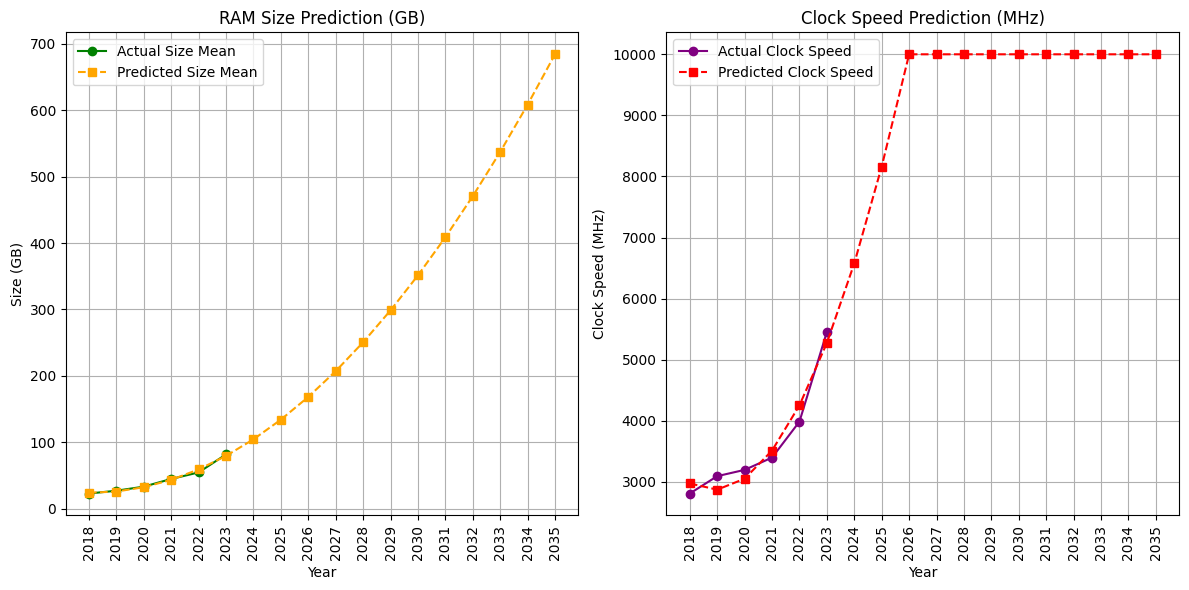

In [170]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Prepare data for polynomial regression
X = df_stats_ram['Year'].values.reshape(-1, 1)  

y_size = df_stats_ram['Size_mean'].values  
y_clock = df_stats_ram['Clock_mean'].values  
y_sticks = df_stats_ram['Sticks_mean'].values  

degree = 2  
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

# Fit polynomial regression models for each feature
model_size = LinearRegression().fit(X_poly, y_size)
model_clock = LinearRegression().fit(X_poly, y_clock)
model_sticks = LinearRegression().fit(X_poly, y_sticks)

# Predict values for future years
years_to_predict = np.arange(2018, 2036).reshape(-1, 1)
years_to_predict_poly = poly.transform(years_to_predict)
predicted_size = model_size.predict(years_to_predict_poly)
predicted_clock = model_clock.predict(years_to_predict_poly)
predicted_sticks = model_sticks.predict(years_to_predict_poly)

predicted_size = np.clip(predicted_size, 0, 1024)  
predicted_clock = np.clip(predicted_clock, 1000, 10000) 
predicted_sticks = np.clip(predicted_sticks, 1, 8)  


plt.figure(figsize=(18, 6))  

# RAM Size Prediction
plt.subplot(1, 3, 1)
plt.plot(df_stats_ram['Year'], df_stats_ram['Size_mean'], label="Actual Size Mean", color='green', marker='o')
plt.plot(years_to_predict, predicted_size, label="Predicted Size Mean", color='orange', linestyle='--', marker='s')
plt.xticks(years_to_predict.flatten(), rotation=45)
plt.title('RAM Size Prediction (GB)')
plt.xlabel('Year')
plt.ylabel('Size (GB)')
plt.legend()
plt.xticks(range(2018, 2036), rotation=90)
plt.grid(True)

# Clock Speed Prediction
plt.subplot(1, 3, 2)
plt.plot(df_stats_ram['Year'], df_stats_ram['Clock_mean'], label="Actual Clock Speed", color='purple', marker='o')
plt.plot(years_to_predict, predicted_clock, label="Predicted Clock Speed", color='red', linestyle='--', marker='s')
plt.xticks(years_to_predict.flatten(), rotation=45)
plt.title('Clock Speed Prediction (MHz)')
plt.xlabel('Year')
plt.ylabel('Clock Speed (MHz)')
plt.legend()
plt.xticks(range(2018, 2036), rotation=90)
plt.grid(True)

plt.tight_layout()
plt.show()
